## Importation des modules nécessaires et du fichier CSV à étudier

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modified_train = pd.read_csv("../data/02_intermediate/sampled_train.csv")

## Calcul des indicateurs demandés

### 1 - Vitesse moyenne de chaque trajet (en km/h)

In [17]:
modified_train['taxi_trip_speed'] = modified_train['Distance'] / modified_train['trip_duration_hours']
modified_train.head()
mean_taxi_trip_speed = round(modified_train['taxi_trip_speed'].mean(), ndigits=4)
print('La vitesse moyenne de chaque trajet est de {} km/h'.format(mean_taxi_trip_speed))

La vitesse moyenne de chaque trajet est de 14.3138 km/h


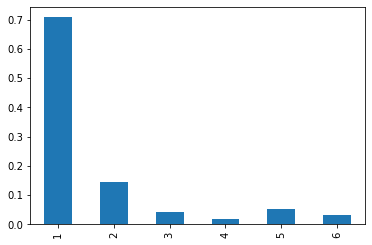

In [18]:
passenger_count_dist = modified_train['passenger_count'].value_counts(normalize=True).sort_index(ascending=True)
passenger_count_dist.plot(kind='bar')
plt.show()

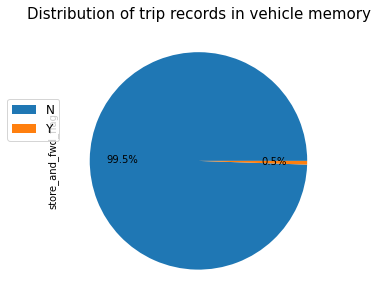

In [19]:
labels = modified_train["store_and_fwd_flag"].value_counts().index
values = modified_train["store_and_fwd_flag"].value_counts()

values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Distribution of trip records in vehicle memory", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

{'Monday': 183453, 'Tuesday': 198846, 'Wednesday': 206187, 'Thursday': 214333, 'Friday': 219087, 'Saturday': 215896, 'Sunday': 190479}


<AxesSubplot:>

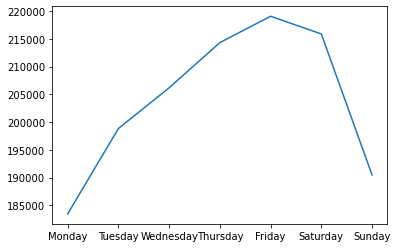

In [20]:
test = modified_train.week_day.value_counts()
days = {"Monday" : 0, "Tuesday" : 0, "Wednesday" : 0, "Thursday" : 0, "Friday" : 0, "Saturday" : 0, "Sunday" : 0}
for x in test.keys() :
    days[x] = test[x]
print(days)
sns.lineplot(x=days.keys(), y=days.values())

In [21]:
DayKM = modified_train[["week_day", "Distance"]]
groupDK = DayKM.groupby("week_day")
print(groupDK.sum())

            Distance
week_day            
Friday     755607.50
Monday     665212.15
Saturday   731246.18
Sunday     722818.61
Thursday   743763.06
Tuesday    675406.00
Wednesday  698811.96


<AxesSubplot:>

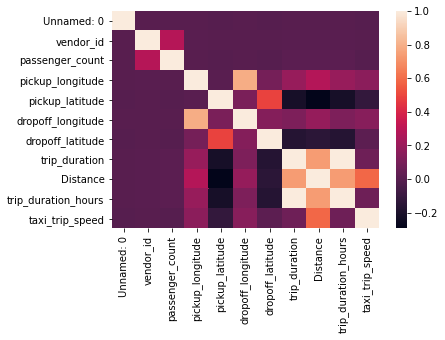

In [22]:
corr = modified_train.corr()
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns
)